In [32]:
import numpy as np
import pandas as pd
np.set_printoptions(threshold=np.nan)
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
%pylab inline
exec(open("/Users/raghuramkowdeed/Documents/afp/get_signal_names.py").read())
exec(open("/Users/raghuramkowdeed/Documents/afp/portfolio_optimizer.py").read())
exec(open("/Users/raghuramkowdeed/Documents/afp/non_linear_signal.py").read())
import datetime


Populating the interactive namespace from numpy and matplotlib


In [2]:
sig_dir = '/Users/raghuramkowdeed/Desktop/afp_data/1000/ranked_rps_data/'

In [3]:
sig_df = pd.DataFrame()
sig_files = os.listdir(sig_dir)
sig_files = np.sort(sig_files)

for sig_file in sig_files :
    if '.csv' not in sig_file :
        continue
    #print(sig_file)
    this_file = sig_dir + sig_file
    this_df = pd.read_csv(this_file, index_col = 'date')
    this_df.index = [ datetime.datetime.strptime(val, '%Y-%m-%d') for val in this_df.index]
    sig_df = sig_df.append(this_df)

In [4]:
begin_date = datetime.datetime.strptime('19900101', '%Y%m%d')
end_date = datetime.datetime.strptime('20170101', '%Y%m%d')

sig_df = sig_df[(sig_df.index>=begin_date) & (sig_df.index<end_date)]

In [5]:
sig_names = get_signal_names()
look_back = 3



In [6]:
l_sig_df = pd.DataFrame()
nl_knn_sig_df = pd.DataFrame()

for sig_name in sig_names :
    print(sig_name)
    this_sig_sr = sig_df[sig_name]
    this_ret_sr = sig_df['ret']
    
    try :
        l_sig_sr = get_linear_sig(sig_sr=this_sig_sr, ret_sr=this_ret_sr, look_back=look_back)
        nl_knn_sig_sr = get_knn_non_linear_sig(sig_sr=this_sig_sr, ret_sr=this_ret_sr, look_back=look_back)
        l_sig_df[sig_name] = l_sig_sr
        nl_knn_sig_df[sig_name] = nl_knn_sig_sr
    except Exception as e:
        print(e)
        print(sig_name + ' failed')
        continue

l_sig_df.index.name = 'date'
nl_knn_sig_df.index.name = 'date'

l_sig_df.to_csv('/Users/raghuramkowdeed/Desktop/afp_data/1000/l_sig_df_'+str(look_back)+'.csv')
nl_knn_sig_df.to_csv('/Users/raghuramkowdeed/Desktop/afp_data/1000/nl_knn_sig_df_'+str(look_back) +'.csv')

absacc
acc
aeavol
age
agr
baspread
beta
betasq
bm
bm_ia
cash
cashdebt
cashpr
cfp
cfp_ia
chatoia
chcsho
chempia
chfeps
chinv
chmom
chnanalyst
chpmia
chtx
cinvest
convind
currat
depr
disp
divi
orgcap
pchcapx_ia
pchcurrat
pchdepr
pchgm_pchsale
pchquick
pchsale_pchinvt
pchsale_pchxsga
pchsaleinv
pctacc
pricedelay
ps
divo
dolvol
dy
ear
egr
ep
fgr5yr
gma
grcapx
grltnoa
herf
hire
idiovol
ill
indmom
invest
ipo
lev
lgr
maxret
mom12m
mom1m
mom36m
mom6m
ms
mve
mve_ia
nanalyst
nincr
operprof
roeq
roic
rsup
salecash
saleinv
salerec
secured
securedind
sfe
sgr
sin
sp
std_dolvol
quick
rd
rd_mve
rd_sale
realestate
retvol
roaq
roavol
std_turn
stdacc
stdcf
sue
tang
tb
turn
zerotrade


In [25]:

pm = PortfolioOptimizer(fac_data_dir='/Users/raghuramkowdeed/Desktop/afp_data/1000/factor_exposure_data/',
                        fac_ret_file = '/Users/raghuramkowdeed/Desktop/afp_data/1000/fac_ret_file.csv',
                        fac_cov_hl = 12.0
                       )



--------


In [26]:
l_sig_df = pd.read_csv('/Users/raghuramkowdeed/Desktop/afp_data/1000/l_sig_df_3.csv', index_col = 'date')
l_sig_df.index = [ datetime.datetime.strptime(val, '%Y-%m-%d') for val in l_sig_df.index]


nl_knn_sig_df = pd.read_csv('/Users/raghuramkowdeed/Desktop/afp_data/1000/nl_knn_sig_df_3.csv', index_col = 'date')
nl_knn_sig_df.index = [ datetime.datetime.strptime(val, '%Y-%m-%d') for val in nl_knn_sig_df.index]



In [27]:

sharpe_df = pd.DataFrame()

for sig_name in l_sig_df.columns :
    try :
        l_sig_sr = l_sig_df[sig_name]
        knn_sig_sr = nl_knn_sig_df[sig_name]
    
        pnl_sr_l= pm.run_signal(sig_sr=l_sig_sr,neu_sig=True)
        pnl_sr_knn = pm.run_signal(sig_sr=knn_sig_sr,neu_sig=True)
    
        l_shrp = pnl_sr_l.mean()*sqrt(12)/pnl_sr_l.std()
        knn_shrp = pnl_sr_knn.mean()*sqrt(12)/pnl_sr_knn.std()
    
        res = pd.Series( [l_shrp, knn_shrp], index=['lm', 'knn'], name = sig_name)
        sharpe_df = sharpe_df.append(res)
        print(res)
        print('--------')
    except Exception as e :
        print(e)
        print(sig_name)
        continue;
    


lm     0.105828
knn    0.141826
Name: absacc, dtype: float64
--------
lm     0.081743
knn    0.329300
Name: acc, dtype: float64
--------
lm    -0.001577
knn    0.020972
Name: aeavol, dtype: float64
--------
lm     0.180774
knn    0.076050
Name: age, dtype: float64
--------
lm    -0.025935
knn    0.139402
Name: agr, dtype: float64
--------
lm     0.159997
knn    0.299633
Name: baspread, dtype: float64
--------
lm     0.295740
knn    0.395238
Name: beta, dtype: float64
--------
lm     0.320492
knn    0.378634
Name: betasq, dtype: float64
--------
lm    -0.068220
knn    0.236615
Name: bm, dtype: float64
--------
lm     0.077634
knn    0.377855
Name: bm_ia, dtype: float64
--------
lm     0.283788
knn    0.225264
Name: cash, dtype: float64
--------
lm     0.108419
knn    0.493653
Name: cashdebt, dtype: float64
--------
lm     0.142365
knn    0.397021
Name: cashpr, dtype: float64
--------
lm     0.205835
knn    0.485899
Name: cfp, dtype: float64
--------
lm     0.032466
knn    0.497992
Name:

In [28]:
sharpe_df.to_csv('~/Desktop/knn_sharpe.csv')


In [31]:
sharpe_df.sort_values(['lm'], ascending=[False])

,knn,lm
sfe,0.804099,0.501885
lev,0.512660,0.367734
fgr5yr,0.455219,0.339687
betasq,0.378634,0.320492
idiovol,0.273198,0.315840
zerotrade,0.256887,0.307801
dy,0.213749,0.306405
beta,0.395238,0.295740
turn,0.274504,0.292966
mom36m,0.232415,0.286482


In [15]:
plot_df = pd.DataFrame()
plot_df['lm'] = pnl_sr_l
plot_df['knn'] = pnl_sr_knn
#plot_df['kernel'] = pnl_sr_kernel

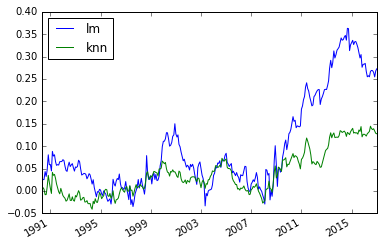

In [16]:
plot_df.cumsum().plot()

In [19]:
( pnl_sr_l.mean()/pnl_sr_l.std() )*sqrt(12)

0.18697019382548333

In [35]:
ret_sr = sig_df['ret']


In [36]:
ret_sr = ret_sr[ (ret_sr.index>=nl_knn_sig_df.index[0]) & (ret_sr.index<=nl_knn_sig_df.index[-1])]

In [37]:
ret_sr.shape

(321000,)

(321000, 101)

In [39]:
glm_sig_df = get_glmnet_sig(l_knn_sig_df, ret_sr, look_back = 12,num_sig_vec =[5,10,20,50], alpha = 0.5 )

,5,10
1991-04-30,0.037892,0.052393
1991-04-30,0.037325,0.051143
1991-04-30,0.037656,0.050307
1991-04-30,0.038019,0.053352
1991-04-30,0.036989,0.049491


In [46]:
glm_pnl_sr = pm.run_signal(sig_sr=glm_sig_df.iloc[:,1],neu_sig=False)

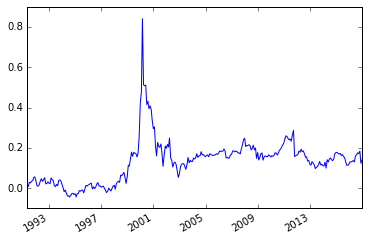

In [47]:
glm_pnl_sr.cumsum().plot()